# Bank Fruad detection model

In [10]:
# All required modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
# Set seaborn style for better visualizations
sns.set()

In [4]:
# Read and plot the dataset
data = pd.read_csv("bank_data.csv")
data.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535,1398,1398,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241,21.228,21.228,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947,150.6193333,150.6193333,1098.9,1098.9,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [5]:
# Preprocessing
data_reduced = data.drop(['msisdn', 'pdate'], axis=1)

label_encoder = LabelEncoder()
for col in data_reduced.columns:
    if data_reduced[col].dtype == 'object':
        data_reduced[col] = label_encoder.fit_transform(data_reduced[col])

X = data_reduced.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)



In [6]:
# Function for plotting ROC-AUC curve
def plot_roc_auc(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.60      0.33      0.42      7121
           1       0.91      0.97      0.94     49880

    accuracy                           0.89     57001
   macro avg       0.76      0.65      0.68     57001
weighted avg       0.87      0.89      0.87     57001

Confusion Matrix of K-Nearest Neighbors:
[[ 2332  4789]
 [ 1534 48346]]


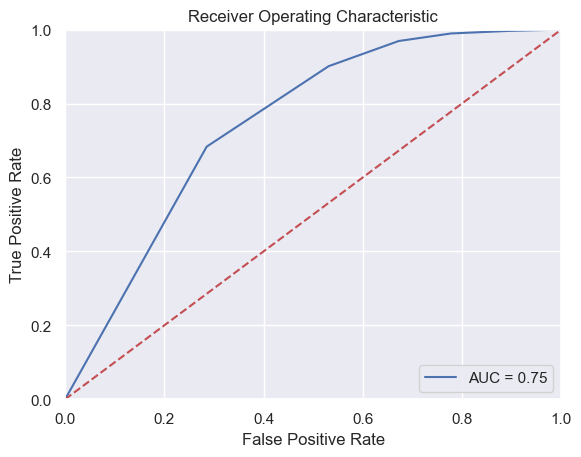

In [11]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred))
plot_roc_auc(y_test, knn.predict_proba(X_test)[:, 1])

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.33      0.78      0.47      7121
           1       0.96      0.78      0.86     49880

    accuracy                           0.78     57001
   macro avg       0.65      0.78      0.66     57001
weighted avg       0.88      0.78      0.81     57001

Confusion Matrix of Random Forest Classifier:
[[ 5530  1591]
 [11009 38871]]


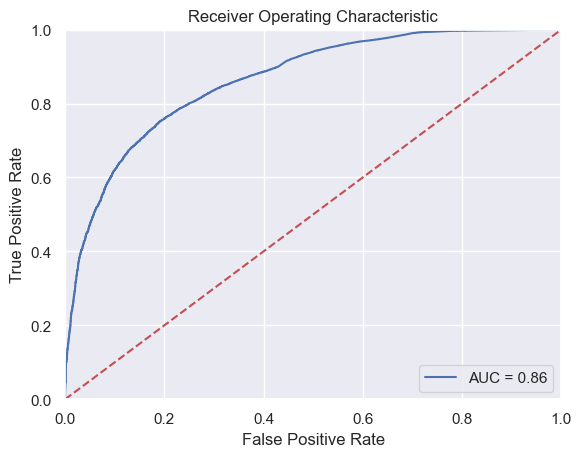

In [12]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight="balanced")
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred))
plot_roc_auc(y_test, rf_clf.predict_proba(X_test)[:, 1])

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.35      0.49      7121
           1       0.91      0.99      0.95     49880

    accuracy                           0.91     57001
   macro avg       0.87      0.67      0.72     57001
weighted avg       0.90      0.91      0.89     57001

Confusion Matrix of XGBoost:
[[ 2516  4605]
 [  559 49321]]


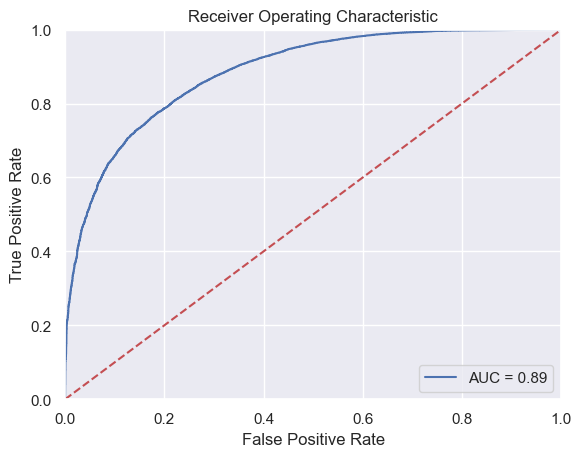

In [8]:
# XGBoost
xgb_clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, random_state=42, verbosity=1)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost:")
print(confusion_matrix(y_test, y_pred))
plot_roc_auc(y_test, xgb_clf.predict_proba(X_test)[:, 1])


Classification Report for Ensemble Models:
              precision    recall  f1-score   support

           0       0.44      0.63      0.52      7121
           1       0.94      0.89      0.91     49880

    accuracy                           0.85     57001
   macro avg       0.69      0.76      0.72     57001
weighted avg       0.88      0.85      0.86     57001

Confusion Matrix of Ensemble Models:
[[ 4494  2627]
 [ 5721 44159]]


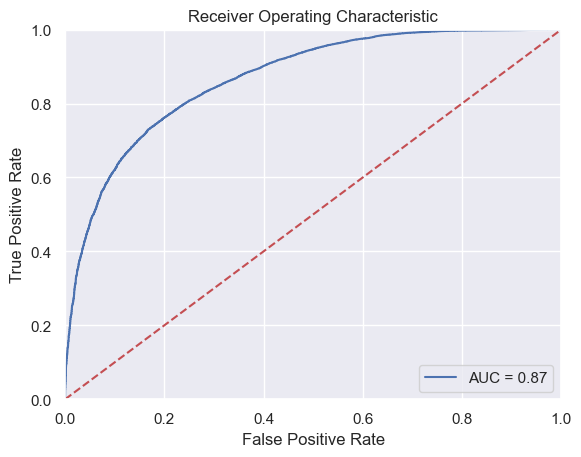

In [13]:
# Ensemble
estimators = [("KNN", knn), ("RF", rf_clf), ("XGB", xgb_clf)]
ensemble = VotingClassifier(estimators=estimators, voting="soft", weights=[1, 4, 1])
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

print("Classification Report for Ensemble Models:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix of Ensemble Models:")
print(confusion_matrix(y_test, y_pred))
plot_roc_auc(y_test, ensemble.predict_proba(X_test)[:, 1])
